In [57]:
import sys, os
import numpy as np
import time, h5py
codepath = '/user_data/mmhender/imStat/code'
sys.path.append(codepath)
from utils import default_paths, nsd_utils, numpy_utils, stats_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

In [71]:
# load LDA results
subject =1;
discrim_type='animacy';
which_prf_grid = 5

path_to_load = default_paths.sketch_token_feat_path
fn1 = os.path.join(path_to_load, 'S%d_mean_grid%d.npy'%(subject, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_var_grid%d.npy'%(subject, which_prf_grid))
print('loading from %s and %s'%(fn1, fn2))
mean_result = np.load(fn1,allow_pickle=True)
var_result = np.load(fn2,allow_pickle=True)
path_to_load = os.path.join(path_to_load, 'semantic_discrim')
fn1 = os.path.join(path_to_load, 'S%d_corrs_%s_grid%d.npy'%(subject, discrim_type, which_prf_grid))
fn2 = os.path.join(path_to_load, 'S%d_dprime_%s_grid%d.npy'%(subject, discrim_type, which_prf_grid))
print('loading from %s and %s'%(fn1, fn2))
corr_result = np.load(fn1,allow_pickle=True)
dprime_result = (-1)*np.load(fn2,allow_pickle=True)


loading from /user_data/mmhender/features/sketch_tokens/S1_mean_grid5.npy and /user_data/mmhender/features/sketch_tokens/S1_var_grid5.npy
loading from /user_data/mmhender/features/sketch_tokens/semantic_discrim/S1_corrs_animacy_grid5.npy and /user_data/mmhender/features/sketch_tokens/semantic_discrim/S1_dprime_animacy_grid5.npy


In [22]:
# Params for the spatial aspect of the model (possible pRFs)
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    
n_prfs = models.shape[0]

number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


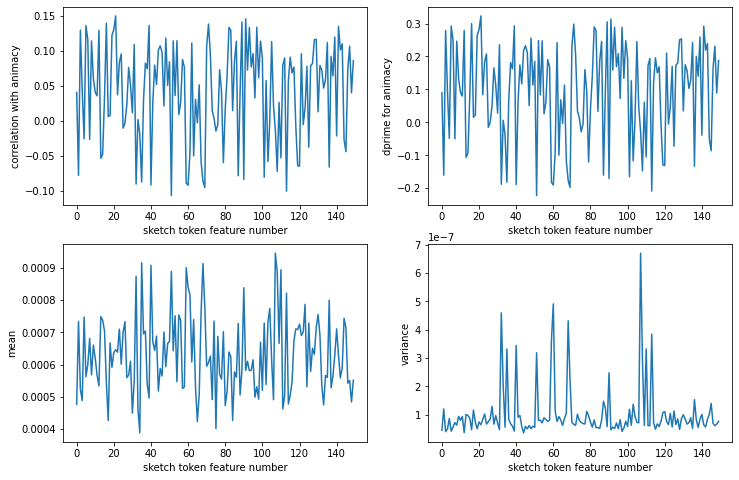

In [73]:
plt.figure(figsize=(12,8));
plt.subplot(2,2,1)
plt.plot(np.mean(corr_result, axis=1)[0:150])
plt.xlabel('sketch token feature number');
plt.ylabel('correlation with %s'%discrim_type);
plt.subplot(2,2,2)
plt.plot(np.mean(dprime_result, axis=1)[0:150])
plt.xlabel('sketch token feature number');
plt.ylabel('dprime for %s'%discrim_type);

plt.subplot(2,2,3)
plt.plot(np.mean(mean_result, axis=1)[0:150])
plt.xlabel('sketch token feature number');
plt.ylabel('mean');
plt.subplot(2,2,4)
plt.plot(np.mean(var_result, axis=1)[0:150])
plt.xlabel('sketch token feature number');
plt.ylabel('variance');

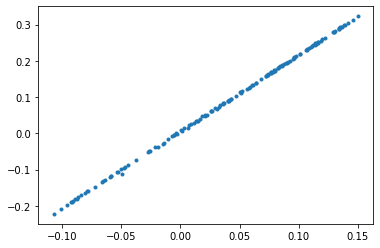

In [74]:
plt.figure();
plt.plot(np.mean(corr_result, axis=1), np.mean(dprime_result, axis=1),'.')

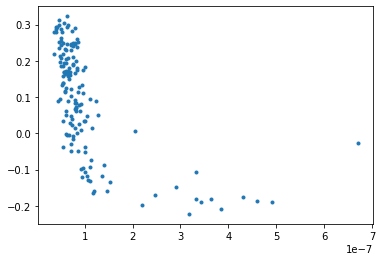

In [76]:
plt.figure();
plt.plot(np.mean(var_result, axis=1)[0:150], np.mean(dprime_result, axis=1)[0:150],'.')

In [78]:
import torch
fit_fn = '/user_data/mmhender/imStat/model_fits/S01/alexnet_all_conv_pca/Nov-23-2021_2247_09/all_fit_params'
out = torch.load(fit_fn)
best_layer = np.argmax(out['val_r2'][:,[1,3,5,7,9]], axis=1)

In [79]:
subject = 1
volume_space=True
fitting_type = 'sketch_tokens'
# fitting_type='sketch_tokens_pca_max100dim'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type, \
                                                  n_from_end=0, root=root, verbose=True);
# load_fits.print_output_summary(out)

loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-27-2021_1805_34/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'corr_each_feature', 'discrim_each_axis', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])


In [34]:
out['use_precomputed_prfs']

True

In [40]:
w = out['best_params'][1][:,:,0]

In [39]:
feature_corrs = out['corr_each_feature']

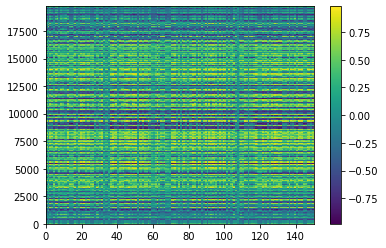

In [45]:
plt.figure();
plt.pcolormesh(feature_corrs)
plt.colorbar()

Text(0, 0.5, 'Correlation of feature with encoding model response')

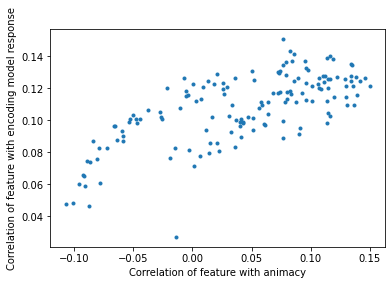

In [80]:
plt.figure();
plt.plot(np.mean(corr_result, axis=1)[0:150], np.mean(feature_corrs, axis=0), '.')
plt.xlabel('Correlation of feature with %s'%discrim_type)
plt.ylabel('Correlation of feature with encoding model response')

Text(0, 0.5, 'Correlation of feature with encoding model response')

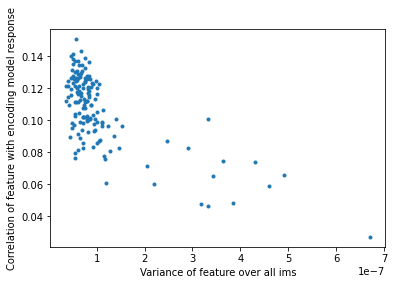

In [81]:
plt.figure();
plt.plot(np.mean(var_result, axis=1)[0:150], np.mean(feature_corrs, axis=0), '.')
plt.xlabel('Variance of feature over all ims')
plt.ylabel('Correlation of feature with encoding model response')

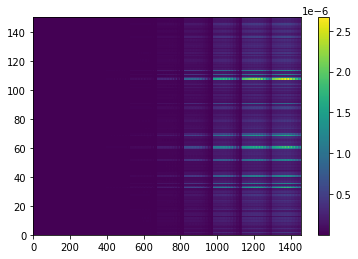

In [92]:
plt.figure();
plt.pcolormesh(var_result[0:150,:])
plt.colorbar()

In [69]:
from utils import roi_utils
roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 
skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def
roi_names = ret_names+face_names+place_names+body_names
nret = len(ret_names)
nface = len(face_names)
nplace = len(place_names)
nbody = len(body_names)    
n_rois = len(ret_names) + len(face_names) + len(place_names) + len(body_names)

is_ret = np.arange(0, n_rois)<nret
is_face = (np.arange(0, n_rois)>=nret) & (np.arange(0, n_rois)<nret+nface)
is_place = (np.arange(0, n_rois)>=nret+nface) & (np.arange(0, n_rois)<nret+nface+nplace)
is_body = np.arange(0, n_rois)>=nret+nface+nplace


[-0.10719733575093278, 0.15008791100365468]
[-0.42260221847703744, 0.5910296750077169]


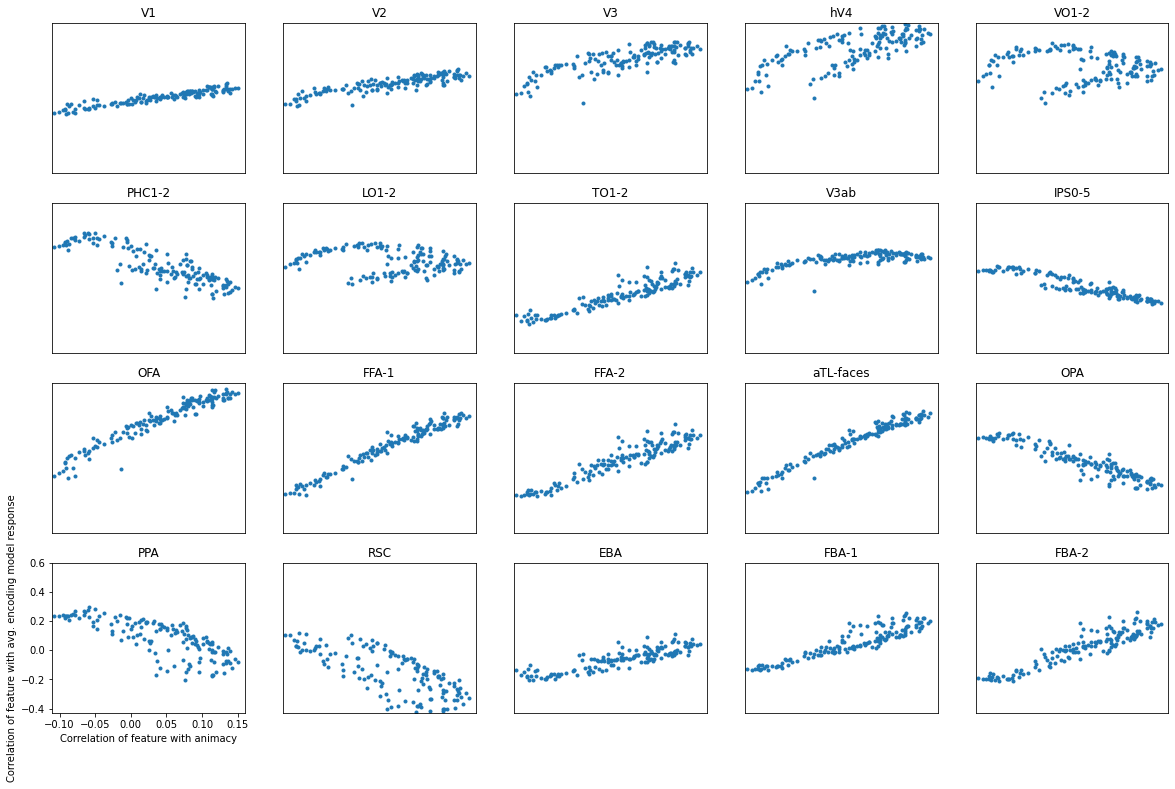

In [70]:

plt.figure(figsize=(20,16))
npx = int(np.ceil(np.sqrt(n_rois)))
npy = int(np.ceil(n_rois/npx))

pi=0
running_xmin=100; running_ymin=100;
running_xmax=-100; running_ymax=-100;
for rr in range(n_rois):

    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
            rname = ret_names[rr]
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
            rname = face_names[rr-nret]
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
            rname = place_names[rr-nret-nface]
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
            rname = body_names[rr-nret-nface-nplace]

        pi+=1
        plt.subplot(npx,npy,pi)
        xvals = np.mean(corr_result, axis=1)[0:150]
        yvals = np.mean(feature_corrs[inds_this_roi,:], axis=0)
        running_xmin = np.min([running_xmin, np.min(xvals)])
        running_ymin = np.min([running_ymin, np.min(yvals)])
        running_xmax = np.max([running_xmax, np.max(xvals)])
        running_ymax = np.max([running_ymax, np.max(yvals)])
        
        plt.plot(xvals, yvals,'.')
        if pi==n_rois-8:
            plt.xlabel('Correlation of feature with %s'%discrim_type)
            plt.ylabel('Correlation of feature with avg. encoding model response')
        else:
            plt.xticks([])
            plt.yticks([])

        plt.title(rname)
        plt.xlim([-0.11, 0.16])
        plt.ylim([-0.43, 0.6])
        
print([running_xmin, running_xmax])
print([running_ymin, running_ymax])


Text(0, 0.5, 'correlation of feature with animacy')

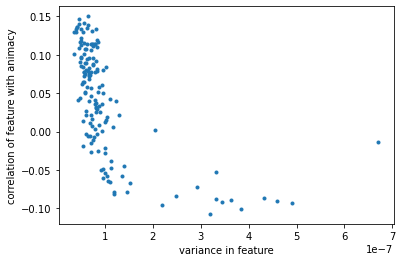

In [95]:
plt.figure();
plt.plot(np.mean(var_result, axis=1)[0:150], np.mean(corr_result, axis=1)[0:150],'.')
plt.xlabel('variance in feature')
plt.ylabel('correlation of feature with %s'%discrim_type)

[3.5270081396328596e-08, 6.707217117393926e-07]
[-0.42260221847703744, 0.5910296750077169]


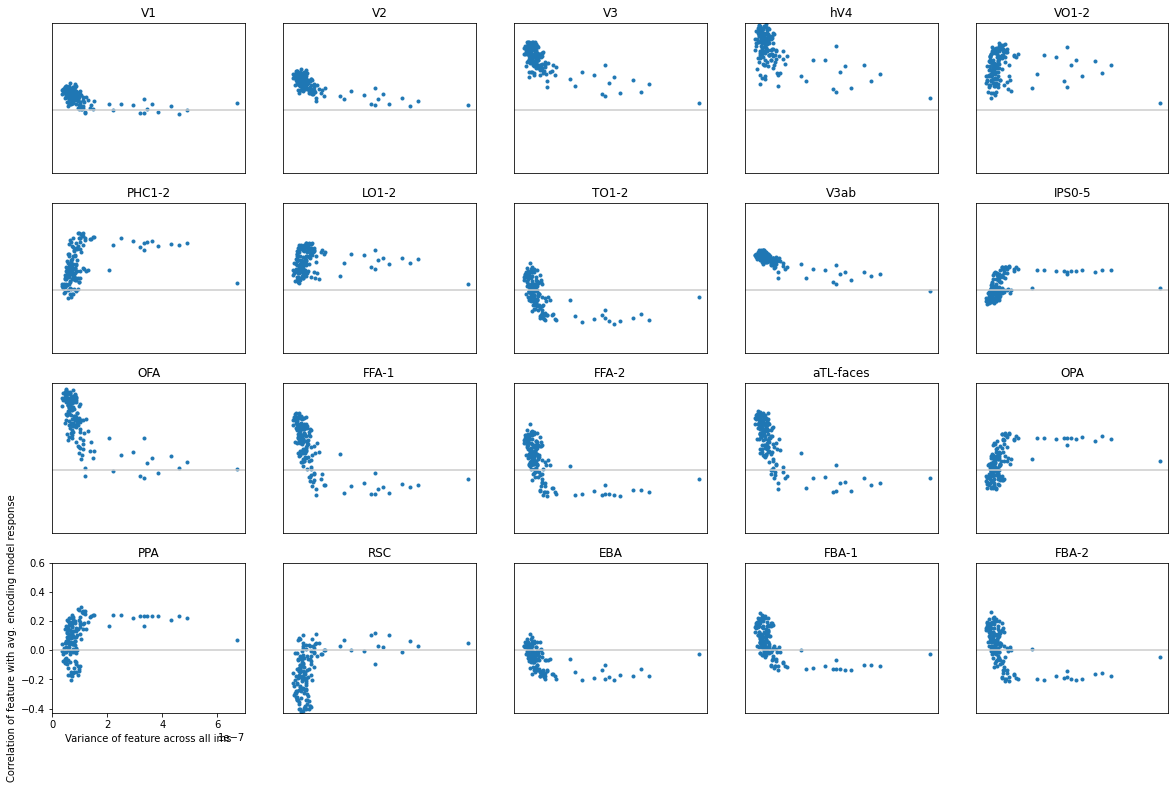

In [89]:

plt.figure(figsize=(20,16))
npx = int(np.ceil(np.sqrt(n_rois)))
npy = int(np.ceil(n_rois/npx))

pi=0
running_xmin=100; running_ymin=100;
running_xmax=-100; running_ymax=-100;
for rr in range(n_rois):

    if rr not in skip_inds:
        if is_ret[rr]:
            inds_this_roi = retlabs==rr
            rname = ret_names[rr]
        elif is_face[rr]:
            inds_this_roi = facelabs==(rr-nret)
            rname = face_names[rr-nret]
        elif is_place[rr]:
            inds_this_roi = placelabs==(rr-nret-nface)
            rname = place_names[rr-nret-nface]
        elif is_body[rr]:
            inds_this_roi = bodylabs==(rr-nret-nface-nplace)
            rname = body_names[rr-nret-nface-nplace]

        pi+=1
        plt.subplot(npx,npy,pi)
        xvals = np.mean(var_result, axis=1)[0:150]
        yvals = np.mean(feature_corrs[inds_this_roi,:], axis=0)
        running_xmin = np.min([running_xmin, np.min(xvals)])
        running_ymin = np.min([running_ymin, np.min(yvals)])
        running_xmax = np.max([running_xmax, np.max(xvals)])
        running_ymax = np.max([running_ymax, np.max(yvals)])
        
        plt.plot(xvals, yvals,'.')
        if pi==n_rois-8:
            plt.xlabel('Variance of feature across all ims');
            plt.ylabel('Correlation of feature with avg. encoding model response');
        else:
            plt.xticks([])
            plt.yticks([])

        plt.title(rname)
        plt.xlim([0, 7e-07])
        plt.ylim([-0.43, 0.6])
        plt.axhline(0, color=[0.8, 0.8, 0.8])
        
print([running_xmin, running_xmax])
print([running_ymin, running_ymax])
